In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

C = 180e-6  # Capacitância (180 uF)
L = 11e-6   # Indutância (11 uH)
R = 85e-3   # Resistência (85 mΩ)
Vc0 = 900.0 # Tensão inicial do capacitor (900 V)
Il0 = 0.0   # Corrente inicial do indutor (0 A)

In [5]:
#modelo 1
def model_rlc(t, y):
    Vc, Il = y
    dVc_dt = -Il / C
    dIl_dt = (Vc - R * Il) / L
    return [dVc_dt, dIl_dt]

In [6]:
# Modelo 2
def model_rl(t, y):
    Vc, Il = y
    dVc_dt = 0.0
    dIl_dt = -(R / L) * Il
    return [dVc_dt, dIl_dt]

Config Simulação

In [7]:
# --- 3. Configuração da Simulação ---

y0 = [Vc0, Il0]
t_final = 0.0015
t_span = (0, t_final)

# Evento: Parar a simulação RLC quando Vc atingir 0
def diode_turn_on(t, y):
    return y[0]  # Retorna Vc

diode_turn_on.terminal = True
diode_turn_on.direction = -1

Simulação

In [8]:
# Parte 1: Simulação RLC
sol_rlc = solve_ivp(
    model_rlc,
    t_span,
    y0,
    events=diode_turn_on,
    dense_output=True,
    method='RK45'
)
t1 = sol_rlc.t
y1_Vc = sol_rlc.y[0]
y1_Il = sol_rlc.y[1]

# Simulação RL
if sol_rlc.t_events[0].size > 0:
    t_event = sol_rlc.t_events[0][0]
    y0_rl = [0.0, sol_rlc.y[1, -1]]
    t_span_rl = (t_event, t_final)

    sol_rl = solve_ivp(
        model_rl,
        t_span_rl,
        y0_rl,
        dense_output=True,
        method='RK45'
    )

    t2 = sol_rl.t
    y2_Vc = sol_rl.y[0]
    y2_Il = sol_rl.y[1]

    # Combinaç~ção os resultados
    t_total = np.concatenate((t1, t2))
    Vc_total = np.concatenate((y1_Vc, y2_Vc))
    Il_total = np.concatenate((y1_Il, y2_Il))
else:
    t_total = t1
    Vc_total = y1_Vc
    Il_total = y1_Il


plotagem

Gráfico 'resposta_circuito_separada.png' gerado com sucesso.


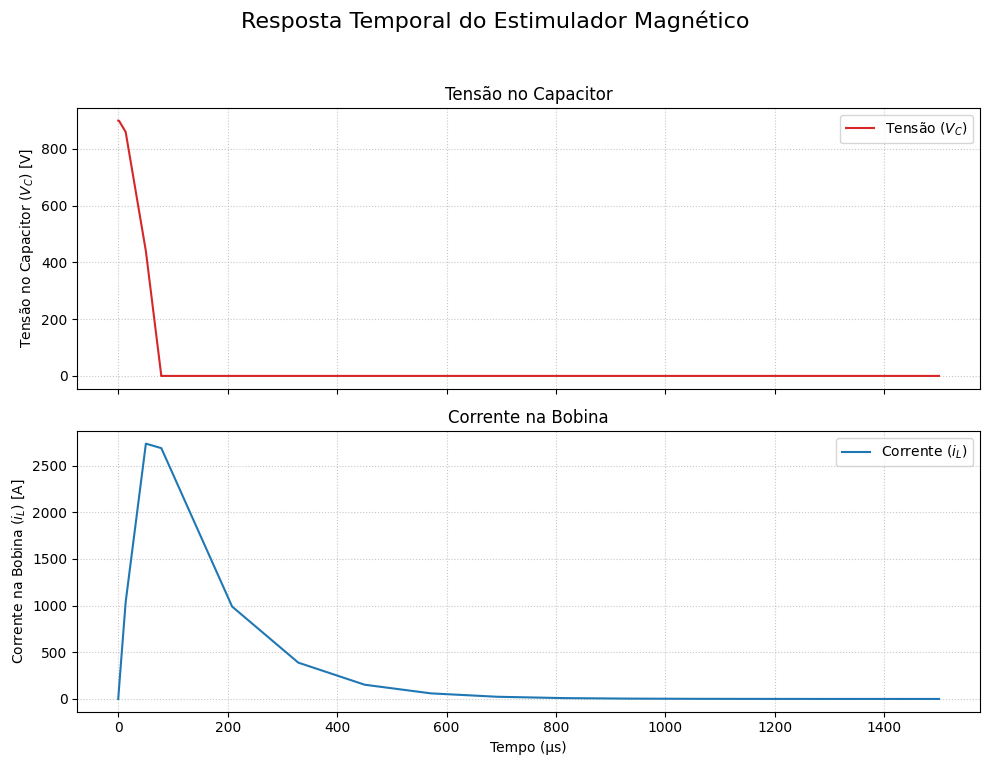

In [9]:
# Converter tempo para microssegundos (µs)
t_plot_us = t_total * 1e6

# Criar uma figura com 2 subplots (2 linhas, 1 coluna)
# sharex=True faz com que o zoom em um gráfico aplique no outro
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- Gráfico da Tensão (Superior) ---
axes[0].plot(t_plot_us, Vc_total, color='tab:red', label='Tensão ($V_C$)')
axes[0].set_ylabel('Tensão no Capacitor ($V_C$) [V]')
axes[0].legend(loc='upper right')
axes[0].grid(linestyle=':', alpha=0.7)
axes[0].set_title('Tensão no Capacitor') # Título do subplot

# --- Gráfico da Corrente (Inferior) ---
axes[1].plot(t_plot_us, Il_total, color='tab:blue', label='Corrente ($i_L$)')
axes[1].set_ylabel('Corrente na Bobina ($i_L$) [A]')
axes[1].set_xlabel('Tempo (µs)')
axes[1].legend(loc='upper right')
axes[1].grid(linestyle=':', alpha=0.7)
axes[1].set_title('Corrente na Bobina') # Título do subplot

# Título principal da figura
fig.suptitle('Resposta Temporal do Estimulador Magnético', fontsize=16)

# Ajusta o layout para evitar sobreposição
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('resposta_circuito_separada.png')

print("Gráfico 'resposta_circuito_separada.png' gerado com sucesso.")